# Atividade de IA

Jose Rodrigo Araujo Limeira


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
# abrindo o dataset
cancer = load_breast_cancer()
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [ ]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
features_array = pd.DataFrame(cancer.dataset_raw, columns=cancer.feature_names)
features_array

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
labels_array = pd.Series(cancer.target)
labels_array

,0
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


In [ ]:
# Dando nomes mais amigáveis às classes (0: Maligno, 1: Benigno)
labels_array = labels_array.map({0: 'Maligno', 1: 'Benigno'})
labels_array

,0
0,Maligno
1,Maligno
2,Maligno
3,Maligno
4,Maligno
...,...
564,Maligno
565,Maligno
566,Maligno
567,Maligno


In [ ]:
# Iremos separar nossos conjunto de dados em dois conjuntos:
# - TREINO: para ensinar o algoritmo (70% dos conjunto de dados)
# - TESTE: para avaliar o algoritmo em conjunto de dados que ele nunca viu (30% dos conjunto de dados)
# `random_state=42` garante que a separação seja sempre a mesma, para reprodutibilidade.
X_train, X_test, y_train, y_test = train_test_split(features_array, labels_array, test_size=0.3, random_state=42)

In [ ]:
X_train

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
149,13.740,17.91,88.12,585.0,0.07944,0.06376,0.02881,0.01329,0.1473,0.05580,...,15.340,22.46,97.19,725.9,0.09711,0.18240,0.15640,0.06019,0.2350,0.07014
124,13.370,16.39,86.10,553.5,0.07115,0.07325,0.08092,0.02800,0.1422,0.05823,...,14.260,22.75,91.99,632.1,0.10250,0.25310,0.33080,0.08978,0.2048,0.07628
421,14.690,13.98,98.22,656.1,0.10310,0.18360,0.14500,0.06300,0.2086,0.07406,...,16.460,18.34,114.10,809.2,0.13120,0.36350,0.32190,0.11080,0.2827,0.09208
195,12.910,16.33,82.53,516.4,0.07941,0.05366,0.03873,0.02377,0.1829,0.05667,...,13.880,22.00,90.81,600.6,0.10970,0.15060,0.17640,0.08235,0.3024,0.06949
545,13.620,23.23,87.19,573.2,0.09246,0.06747,0.02974,0.02443,0.1664,0.05801,...,15.350,29.09,97.58,729.8,0.12160,0.15170,0.10490,0.07174,0.2642,0.06953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,8.888,14.64,58.79,244.0,0.09783,0.15310,0.08606,0.02872,0.1902,0.08980,...,9.733,15.67,62.56,284.4,0.12070,0.24360,0.14340,0.04786,0.2254,0.10840
106,11.640,18.33,75.17,412.5,0.11420,0.10170,0.07070,0.03485,0.1801,0.06520,...,13.140,29.26,85.51,521.7,0.16880,0.26600,0.28730,0.12180,0.2806,0.09097
270,14.290,16.82,90.30,632.6,0.06429,0.02675,0.00725,0.00625,0.1508,0.05376,...,14.910,20.65,94.44,684.6,0.08567,0.05036,0.03866,0.03333,0.2458,0.06120
435,13.980,19.62,91.12,599.5,0.10600,0.11330,0.11260,0.06463,0.1669,0.06544,...,17.040,30.80,113.90,869.3,0.16130,0.35680,0.40690,0.18270,0.3179,0.10550


In [ ]:
X_test

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
204,12.470,18.60,81.09,481.9,0.09965,0.10580,0.08005,0.03821,0.1925,0.06373,...,14.97,24.64,96.05,677.9,0.1426,0.23780,0.2671,0.10150,0.3014,0.08750
70,18.940,21.31,123.60,1130.0,0.09009,0.10290,0.10800,0.07951,0.1582,0.05461,...,24.86,26.58,165.90,1866.0,0.1193,0.23360,0.2687,0.17890,0.2551,0.06589
131,15.460,19.48,101.70,748.9,0.10920,0.12230,0.14660,0.08087,0.1931,0.05796,...,19.26,26.00,124.90,1156.0,0.1546,0.23940,0.3791,0.15140,0.2837,0.08019
431,12.400,17.68,81.47,467.8,0.10540,0.13160,0.07741,0.02799,0.1811,0.07102,...,12.88,22.91,89.61,515.8,0.1450,0.26290,0.2403,0.07370,0.2556,0.09359
540,11.540,14.44,74.65,402.9,0.09984,0.11200,0.06737,0.02594,0.1818,0.06782,...,12.26,19.68,78.78,457.8,0.1345,0.21180,0.1797,0.06918,0.2329,0.08134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,12.780,16.49,81.37,502.5,0.09831,0.05234,0.03653,0.02864,0.1590,0.05653,...,13.46,19.76,85.67,554.9,0.1296,0.07061,0.1039,0.05882,0.2383,0.06410
542,14.740,25.42,94.70,668.6,0.08275,0.07214,0.04105,0.03027,0.1840,0.05680,...,16.51,32.29,107.40,826.4,0.1060,0.13760,0.1611,0.10950,0.2722,0.06956
176,9.904,18.06,64.60,302.4,0.09699,0.12940,0.13070,0.03716,0.1669,0.08116,...,11.26,24.39,73.07,390.2,0.1301,0.29500,0.3486,0.09910,0.2614,0.11620
501,13.820,24.49,92.33,595.9,0.11620,0.16810,0.13570,0.06759,0.2275,0.07237,...,16.01,32.94,106.00,788.0,0.1794,0.39660,0.3381,0.15210,0.3651,0.11830


In [ ]:
print(f"\nDados carregados e divididos:")
print(f" - Tamanho do conjunto de treino: {len(X_train)} amostras")
print(f" - Tamanho do conjunto de teste: {len(X_test)} amostras")


Dados carregados e divididos:
 - Tamanho do conjunto de treino: 398 amostras
 - Tamanho do conjunto de teste: 171 amostras


In [ ]:
# Criando o algoritmo da árvore
arvore = DecisionTreeClassifier(random_state=42)

# Treinando o algoritmo com os conjunto de dados de TREINO
arvore.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Fazendo previsões nos conjunto de dados de TREINO e de TESTE
pred_treino_arvore = arvore.predict(X_train)
pred_teste_arvore = arvore.predict(X_test)

In [ ]:
# Avaliando a performance
acc_treino_arvore = accuracy_score(y_train, pred_treino_arvore)
acc_teste_arvore = accuracy_score(y_test, pred_teste_arvore)

In [ ]:
acc_treino_arvore

1.0

In [ ]:
acc_teste_arvore

0.9415204678362573

In [ ]:
print(f"Acurácia no TREINO: {acc_treino_arvore:.4f} (Perfeito!)")
print(f"Acurácia no TESTE:  {acc_teste_arvore:.4f} (Bom, mas caiu bastante)")
print("\nOVERFITTING: a árvore 'decorou' os dados de treino (100% de acerto),")
print("mas sua performance caiu em dados novos (não vistos no treinamento), pois ela é muito específica.")


Acurácia no TREINO: 1.0000 (Perfeito!)
Acurácia no TESTE:  0.9415 (Bom, mas caiu bastante)

OVERFITTING: a árvore 'decorou' os dados de treino (100% de acerto),
mas sua performance caiu em dados novos (não vistos no treinamento), pois ela é muito específica.


In [ ]:
# Agora, Iremos ajustar o algoritmo uma floresta com 100 árvores e comparar.

print("\n--- Treinando uma FLORESTA ALEATÓRIA ---")

# Criando o algoritmo da floresta (diferentes n_estimators)
floresta = RandomForestClassifier(n_estimators=100, random_state=42)

# Treinando o algoritmo com os mesmos conjunto de dados de TREINO
floresta.fit(X_train, y_train)


--- Treinando uma FLORESTA ALEATÓRIA ---


RandomForestClassifier(random_state=42)

In [ ]:
# Fazendo previsões nos conjunto de dados de TREINO e de TESTE
pred_treino_floresta = floresta.predict(X_train)
pred_teste_floresta = floresta.predict(X_test)

In [ ]:
# Avaliando a performance
acc_treino_floresta = accuracy_score(y_train, pred_treino_floresta)
acc_teste_floresta = accuracy_score(y_test, pred_teste_floresta)

In [ ]:
print(f"Acurácia no TREINO: {acc_treino_floresta:.4f} (Ainda perfeito, mas mais robusto)")
print(f"Acurácia no TESTE:  {acc_teste_floresta:.4f} (Excelente resultado!)")
print("\nNote que a Floresta Aleatória manteve uma alta performance nos dados de teste.")
print("A combinação de várias árvores reduziu o overfitting e criou um modelo mais generalista e confiável.")


Acurácia no TREINO: 1.0000 (Ainda perfeito, mas mais robusto)
Acurácia no TESTE:  0.9708 (Excelente resultado!)

Note que a Floresta Aleatória manteve uma alta performance nos dados de teste.
A combinação de várias árvores reduziu o overfitting e criou um modelo mais generalista e confiável.


In [ ]:
# Testando diferentes quantidades de árvores (otimização)
print("\n--- Avaliando diferentes valores de n_estimators ---")

valores_estimadores = [1, 10, 20, 50, 100, 200]
resultados = []

for n in valores_estimadores:
    floresta_temp = RandomForestClassifier(n_estimators=n, random_state=42)
    floresta_temp.fit(X_train, y_train)
    pred_teste = floresta_temp.predict(X_test)
    accuracy_score_val = accuracy_score(y_test, pred_teste)
    resultados.append((n, accuracy_score_val))
    print(f"n_estimators = {n:3d} → Acurácia no teste: {acc:.4f}")



--- Avaliando diferentes valores de n_estimators ---
n_estimators =   1 → Acurácia no teste: 0.9474
n_estimators =  10 → Acurácia no teste: 0.9708
n_estimators =  20 → Acurácia no teste: 0.9766
n_estimators =  50 → Acurácia no teste: 0.9708
n_estimators = 100 → Acurácia no teste: 0.9708
n_estimators = 200 → Acurácia no teste: 0.9708


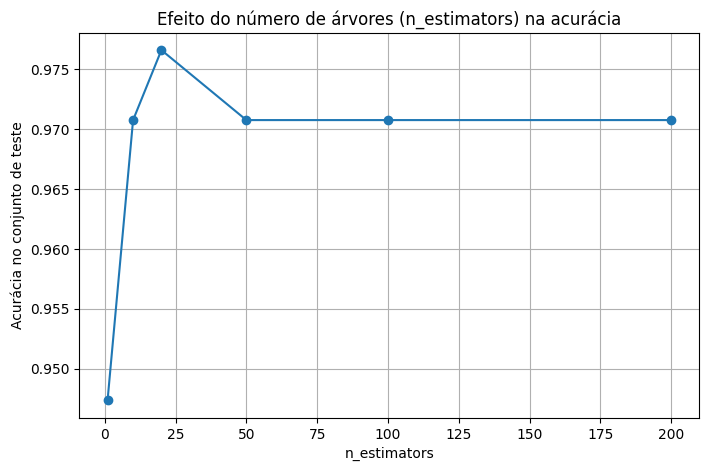

In [ ]:
# Grafico
plt.figure(figsize=(8, 5))
plt.plot([r[0] for r in resultados], [r[1] for r in resultados], marker='o')
plt.title('Efeito do número de árvores (n_estimators) na acurácia')
plt.xlabel('n_estimators')
plt.ylabel('Acurácia no conjunto de teste')
plt.grid(True)
plt.show()

In [ ]:
print("\n--- Avaliando diferentes valores de max_depth (n_estimators = 100 fixo) ---")

valores_profundidade = [2, 4, 6, 8, 10, 15, 20, 100, None]
resultados_depth = []

for d in valores_profundidade:
    floresta_temp = RandomForestClassifier(
        n_estimators=100,
        max_depth=d,
        random_state=42
    )
    floresta_temp.fit(X_train, y_train)

    pred_treino = floresta_temp.predict(X_train)
    pred_teste = floresta_temp.predict(X_test)

    acc_train = accuracy_score(y_train, pred_treino)
    acc_test = accuracy_score(y_test, pred_teste)

    resultados_depth.append((d if d else "None", acc_train, acc_test))
    print(f"max_depth = {str(d):>4} → Acurácia (Treino): {acc_train:.4f} | (Teste): {acc_test:.4f}")


--- Avaliando diferentes valores de max_depth (n_estimators = 100 fixo) ---
max_depth =    2 → Acurácia (Treino): 0.9648 | (Teste): 0.9532
max_depth =    4 → Acurácia (Treino): 0.9899 | (Teste): 0.9708
max_depth =    6 → Acurácia (Treino): 0.9975 | (Teste): 0.9649
max_depth =    8 → Acurácia (Treino): 1.0000 | (Teste): 0.9708
max_depth =   10 → Acurácia (Treino): 1.0000 | (Teste): 0.9708
max_depth =   15 → Acurácia (Treino): 1.0000 | (Teste): 0.9708
max_depth =   20 → Acurácia (Treino): 1.0000 | (Teste): 0.9708
max_depth =  100 → Acurácia (Treino): 1.0000 | (Teste): 0.9708
max_depth = None → Acurácia (Treino): 1.0000 | (Teste): 0.9708


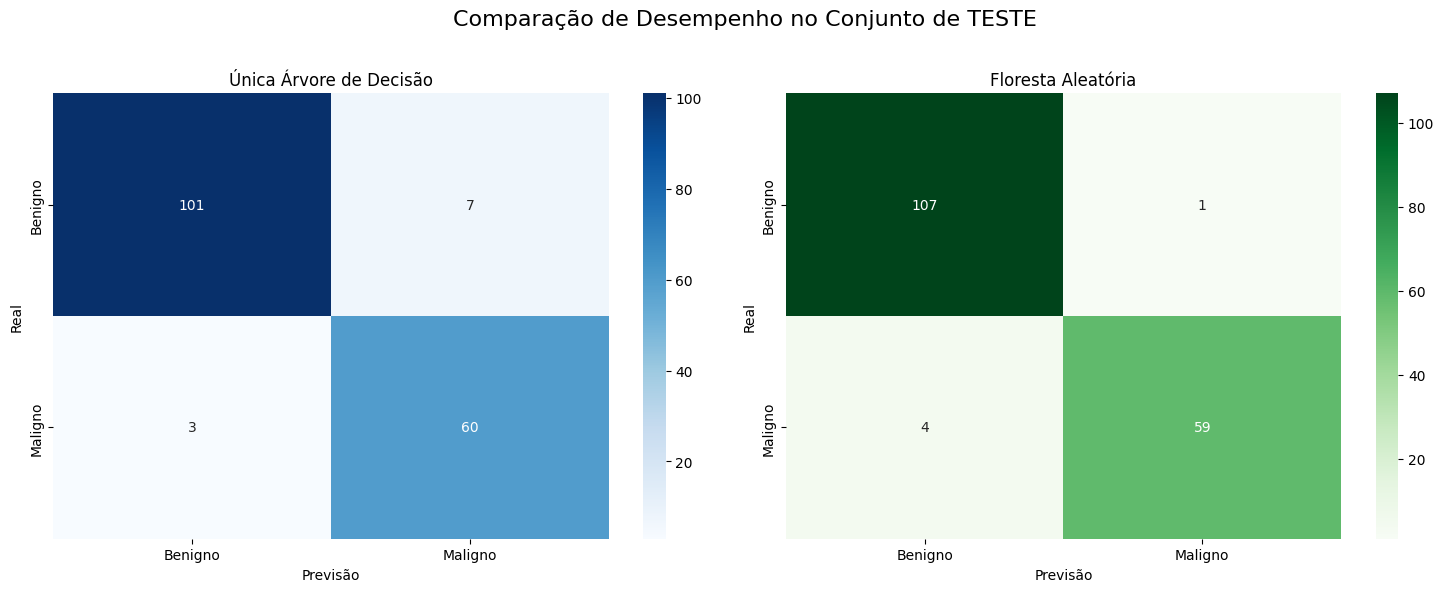

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Comparação de Desempenho no Conjunto de TESTE', fontsize=16)

# Matriz para a Árvore de Decisão
cm_arvore = confusion_matrix(y_test, pred_teste_arvore)
sns.heatmap(cm_arvore, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=floresta.classes_, yticklabels=floresta.classes_)
axes[0].set_title('Única Árvore de Decisão')
axes[0].set_xlabel('Previsão')
axes[0].set_ylabel('Real')

# Matriz para a Floresta Aleatória
cm_floresta = confusion_matrix(y_test, pred_teste_floresta)
sns.heatmap(cm_floresta, annot=True, fmt='d', cmap='Greens', ax=axes[1],
            xticklabels=floresta.classes_, yticklabels=floresta.classes_)
axes[1].set_title('Floresta Aleatória')
axes[1].set_xlabel('Previsão')
axes[1].set_ylabel('Real')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [ ]:
print("\nAnalisando as matrizes, podemos ver o número exato de erros e acertos.")
print(f"A Árvore Única errou {cm_arvore.sum() - cm_arvore.trace()} vezes.")
print(f"A Floresta Aleatória errou {cm_floresta.sum() - cm_floresta.trace()} vezes.")



Analisando as matrizes, podemos ver o número exato de erros e acertos.
A Árvore Única errou 10 vezes.
A Floresta Aleatória errou 5 vezes.


In [ ]:
# Uma grande vantagem da Floresta Aleatória é que ela pode nos dizer quais
# características (features) foram mais importantes para a tomada de decisão.

print("\n--- Importância das Features segundo a Floresta Aleatória ---")

# Criando uma série pandas para visualizar/analisar melhor
importancias = pd.Series(dataset_raw=floresta.feature_importances_, index=features_array.columns)
importancias


--- Importância das Features segundo a Floresta Aleatória ---


,0
mean radius,0.032312
mean texture,0.011064
mean perimeter,0.060092
mean area,0.053810
mean smoothness,0.006223
mean compactness,0.009216
mean concavity,0.080557
mean concave points,0.141934
mean symmetry,0.003278
mean fractal dimension,0.003140


In [ ]:
# Ordenando e pegando as 10 mais importantes
importancias_sorted = importancias.sort_values(ascending=False).head(10)
importancias_sorted

,0
mean concave points,0.141934
worst concave points,0.127136
worst area,0.118217
mean concavity,0.080557
worst radius,0.077975
worst perimeter,0.074292
mean perimeter,0.060092
mean area,0.053810
worst concavity,0.041080
mean radius,0.032312


/tmp/ipython-input-1495854787.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importancias_sorted, y=importancias_sorted.index, palette='viridis')


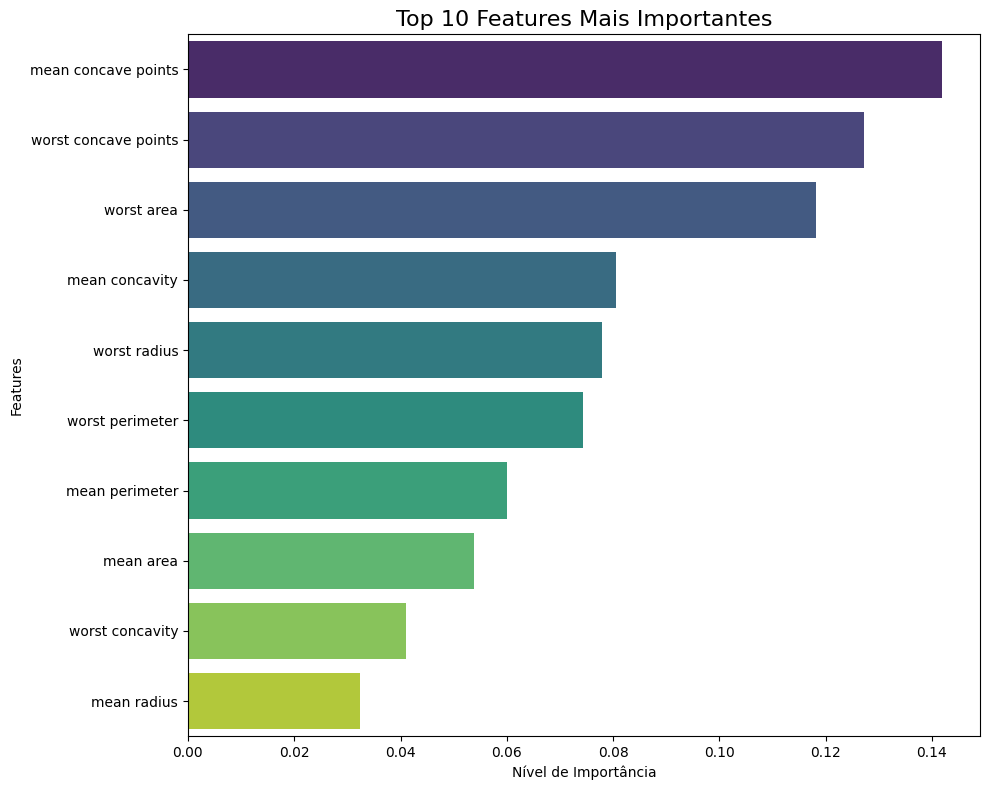

In [ ]:
# Criando o gráfico
plt.figure(figsize=(10, 8))
sns.barplot(x=importancias_sorted, labels_array=importancias_sorted.index, palette='viridis')
plt.title('Top 10 Features Mais Importantes', fontsize=16)
plt.xlabel('Nível de Importância')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

In [ ]:
print("\nO gráfico acima mostra quais exames/medidas o modelo mais utilizou para")
print("diferenciar um tumor maligno de um benigno. Uma informação muito valiosa!")


O gráfico acima mostra quais exames/medidas o modelo mais utilizou para
diferenciar um tumor maligno de um benigno. Uma informação muito valiosa!


# Perguntas

In [ ]:
# 1. O que acontece com a acurácia à medida que aumentamos o número de
# árvores na floresta? A performance melhora indefinidamente ou chega a um ponto
# em que o ganho é muito pequeno?

# R: não. A acurácia tende a aumentar até determinado ponto (em torno de 100-200),
# onde se estabiliza e adicionar mais árvores aumenta o uso de memória e o tempo
# de processamento.

In [ ]:
# 2. Como o parâmetro max_depth afeta o overfitting?
# Descreva o que aconteceu com a acurácia de treino e a de teste à medida que a
# profundidade das árvores aumentou.

# R: O max_depth controla até onde as árvores podem crescer em complexidade.
# Quanto maior o max_depth, maior o aprendizado em conjunto de dados de treino.

# A acurácia de treino cresce até 100% e a de teste cresce até certo ponto, onde
# se estabiliza.